In [1]:
DATA_PATH = 'Data/customer_acquisition_data.csv'

In [2]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pd.options.display.float_format = '{:.2f}'.format

In [16]:
sns.set_palette('Set2')

### `Exploratory Data Analysis And Visualization`

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()


,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [12]:
# summary statistics
df.describe()

,customer_id,cost,conversion_rate,revenue
count,800.00,800.00,800.00,800.00
mean,400.50,13.15,0.09,2769.15
std,231.08,9.92,0.06,1259.54
min,1.00,5.25,0.02,500.00
25%,200.75,5.25,0.04,1694.00
50%,400.50,8.32,0.04,2764.00
75%,600.25,9.55,0.12,3824.25
max,800.00,30.45,0.17,4998.00


### `Distribution of Numeric Variables`

<AxesSubplot:title={'center':'Distribution of Revenue'}, xlabel='revenue', ylabel='Count'>

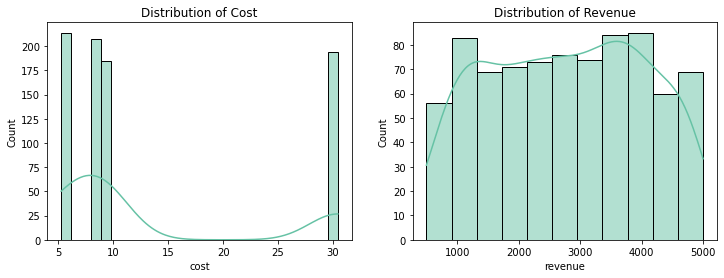

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.set_title('Distribution of Cost')
sns.histplot(df, x='cost', kde=True, ax=ax1)
ax2.set_title('Distribution of Revenue')
sns.histplot(df, x='revenue', kde=True, ax=ax2)

- `Cost` contain 4 unique value and have relatively balance distribution
- `Revenue` categorized into 11 bins

### `Distribution of Categorical Variables`

<AxesSubplot:xlabel='channel', ylabel='count'>

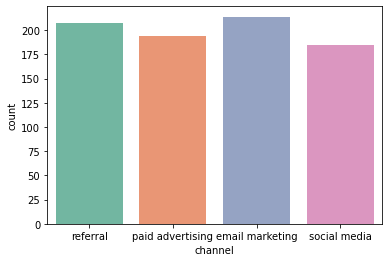

In [19]:
sns.countplot(data=df, x='channel')

- the count of each channel appear to be relatively close to each other. this suggests Customer Acqusition efforts where distributed somewhat evenly across these channel 

### Customer Acquisition Cost by Channel.

<AxesSubplot:xlabel='channel', ylabel='cost'>

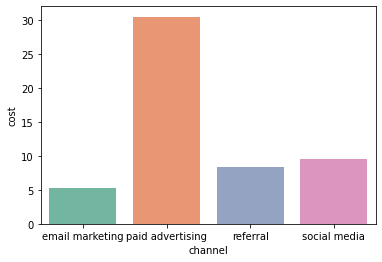

In [20]:
# agg the data to analyze the performance of each channnel to understand which channels are most effective

channel_group = df.groupby('channel')
# agg cost for each channel
cost_by_channel = channel_group['cost'].mean().reset_index()
# plot
sns.barplot(data=cost_by_channel, x='channel', y='cost')

- we osbserve that the `paid advertising` has the highest average cost
- on the other hand the `email marketying`, `referral`, `social media` have relatively lower avg cost 

### Conversion Rate by Channel.

<AxesSubplot:xlabel='channel', ylabel='conversion_rate'>

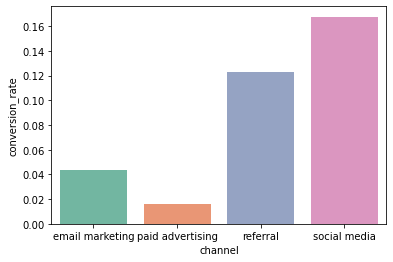

In [21]:
# agg conversion_rate
rate_by_channel = channel_group['conversion_rate'].mean().reset_index()

# plot
sns.barplot(data=rate_by_channel, x='channel', y='conversion_rate')

- `social media` has the highest conversion rate, indicating that it more successful channel for customer acquiring
- `referral` also relatively high
- `email marketing`, `paid advertising` have the lowest conversion rate, may require further optimization

### Revenue Rate by Channel.

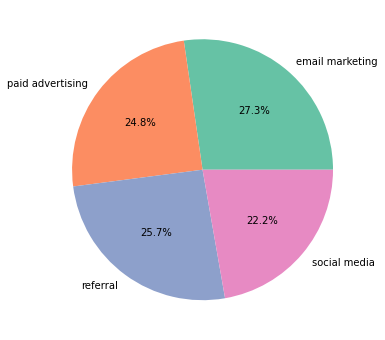

In [26]:
# agg revenue
revenue_by_channel = channel_group['revenue'].sum().reset_index()
# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(x=revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%');

-  each channel plays a significant role in generating revenue, with `email marketing` being the highest contributor.

### `ROI`
(ROI) is a financial metric used to evaluate the profitability and efficiency of an investment.It measures the return or gain generated from an investment relative to its cost.

In [28]:
# ROI = Revenue - Cost / Cost

df['ROI'] = (df['revenue'] - df['cost'])/df['cost']
df.head()

,customer_id,channel,cost,conversion_rate,revenue,ROI
0,1,referral,8.32,0.12,4199,503.67
1,2,paid advertising,30.45,0.02,3410,110.99
2,3,email marketing,5.25,0.04,3164,602.10
3,4,social media,9.55,0.17,1520,158.22
4,5,referral,8.32,0.12,2419,289.73


### `ROI by Channel Analysis`

<AxesSubplot:xlabel='channel', ylabel='ROI'>

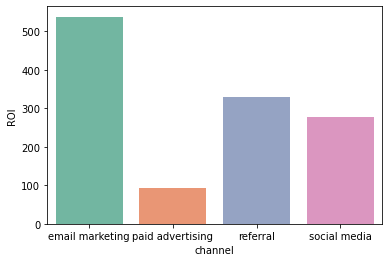

In [29]:
# agg roi by channel
roi_by_channel = df.groupby('channel')['ROI'].mean().reset_index()
# plot
sns.barplot(data=roi_by_channel, x='channel', y='ROI')

- `Email marketing` appear to be the most effective channel of generating returns followed by `referral`, `social media`.
- `paid advertising` has the lowest ROI compared to other channel.

<AxesSubplot:>

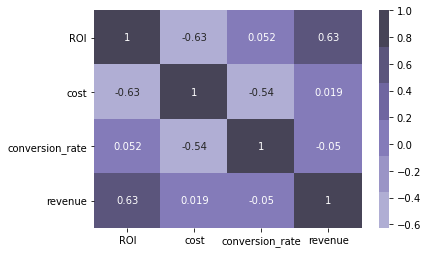

In [31]:
# correlation
corr = df[['ROI', 'cost', 'conversion_rate', 'revenue']].corr()
# plot
sns.heatmap(corr, annot=True, cmap=sns.color_palette('Purples_d'))

- `cost` and `revenue` have the strongest relationships with `ROI`. Higher `costs` are associated with lower `ROI`, while higher `revenue` is associated with higher ROI.

### `Customer Life Time Value (CLTV)`

- **analysis is a method used by businesses to estimate the total value a customer will generate over the entire duration of their relationship with the company.**
- **valuable metric that helps businesses understand the long-term profitability and worth of their customer base.**
- **allows us to assess the long-term value of customers acquired through different marketing channels.**

In [32]:
# cltv = (revenue - cost)*coversion_rate/cost
df['CLTV'] = (df['revenue'] - df['cost'])*df['conversion_rate']/df['cost']
df.head()

,customer_id,channel,cost,conversion_rate,revenue,ROI,CLTV
0,1,referral,8.32,0.12,4199,503.67,62.02
1,2,paid advertising,30.45,0.02,3410,110.99,1.81
2,3,email marketing,5.25,0.04,3164,602.10,26.39
3,4,social media,9.55,0.17,1520,158.22,26.52
4,5,referral,8.32,0.12,2419,289.73,35.68


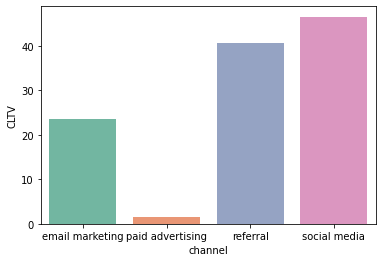

In [39]:
cltv_by_channel = df.groupby('channel')['CLTV'].mean().reset_index()
sns.barplot(data=cltv_by_channel, x='channel', y='CLTV');

- `referral` and `social media` channels stand out as the most effective in terms of generating higher customer lifetime value (CLTV). `Email marketing` also performs reasonably well, while `paid advertising` lags behind in terms of CLTV.

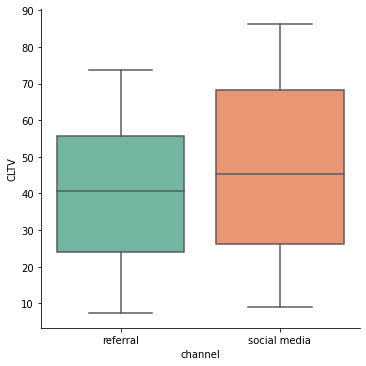

In [40]:
select = df[df['channel'].isin(['referral', 'social media'])]

sns.catplot(data=select, x='channel', y='CLTV', kind='box');

- `social media` channel performs the best, but the `referral` channel is not much worse.